In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
exp1_path = '../data/Exp 1/data/cleaned/'
exp2a_path = '../data/Exp 2a/data/cleaned/'
exp2b_path = '../data/Exp 2b/data/cleaned/'

In [3]:
#Grab total number of participants for each study
exp1_data = glob.glob(exp1_path+'*.csv')
print("Exp1 total: ", len(exp1_data))

def get_participants_per_cond(list_of_data):
    background = []
    nBack = []
    for f_name in list_of_data:
        if 'task-background' in f_name:
            background.append(f_name)
        elif 'task-2back' in f_name:
            nBack.append(f_name)
    return background, nBack
exp2a_data = glob.glob(exp2a_path+'*.csv')
exp2a_background, exp2a_nBack = get_participants_per_cond(exp2a_data)
print("Exp2a total: ", len(exp2a_data))
print("Exp2a background: ", len(exp2a_background))
print("Exp2a nBack: ", len(exp2a_nBack))

exp2b_data = glob.glob(exp2b_path+'*.csv')
exp2b_background, exp2b_nBack = get_participants_per_cond(exp2b_data)
print("Exp2b total: ", len(exp2b_data))
print("Exp2b background: ", len(exp2b_background))
print("Exp2b nBack: ", len(exp2b_nBack))


Exp1 total:  80
Exp2a total:  137
Exp2a background:  55
Exp2a nBack:  82
Exp2b total:  132
Exp2b background:  68
Exp2b nBack:  64


In [4]:
#Create dictionary to store excluded files and reasons
exclusion_dict = {}
exclusion_dict['f_name'] = []
exclusion_dict['exclusion_criteria'] = []

In [5]:
def exp2_conditional(df):
    df = df[['pictures', 'key_resp.corr', 'answer']].dropna()
    pic = df["pictures"].values.tolist()
    corr = df["key_resp.corr"].values.tolist()
    press = df['answer'].sum()
    nback_only = []
    clock_only = []
    both = []
    i = 0
    for count in range(6*9):
        pool = []
        for n in range(6):
            if n+i > 1:
                if pic[n+i] in pool:
                    if pic[n+i] == pic[n+i-2]:
                        both.append(corr[n+i])
                    else:
                        clock_only.append(corr[n+i])
                elif pic[n+i] not in pool:
                    if pic[n+i] == pic[n+i-2]:
                        nback_only.append(corr[n+i])
            pool.append(pic[n+i])
        i = i + 6
    nback_acc = sum(nback_only) / len(nback_only)
    clock_acc = sum(clock_only) / len(clock_only)
    both_acc = sum(both) / len(both)

    return nback_acc, clock_acc, both_acc, len(nback_only)+len(both), len(clock_only)+len(both), [len(nback_only), len(clock_only), len(both)]

In [6]:
def get_present_accuracy(df):
    return df['key_resp.corr'].sum()/len(df['key_resp.corr'].dropna())

In [7]:
def visualize_accuracy_hist(list_of_acc, title):

    # Create a figure and axis
    fig, ax = plt.subplots()
    ax.hist(list_of_acc, bins=10, edgecolor = 'black')


    # Set the titles for the axes and the plot
    ax.set_xlabel('Accuracy')
    ax.set_ylabel('Count')
    ax.set_title(title)

# Display the plot
    plt.show()


In [8]:
def overall_acc(path, title, exp1 = False, add_to_exclusion_dict = True, excluded_files = []):
    files = glob.glob(path+'*.csv')
    print('len files = ', len(files))
    if exp1:
        files = [i for i in files if '2back' not in i]
    low_acc = []
    high_acc = []
    all_accuracys = []
    for f_name in files:
        if f_name not in excluded_files:
            df = pd.read_csv(f_name)
            #file = os.path.basename(f_name)
            acc = get_present_accuracy(df)
            all_accuracys.append(acc)
            if acc < 0.9:
                low_acc.append(f_name)
                exclusion_dict['f_name'].append(f_name)
                exclusion_dict['exclusion_criteria'].append('present_accuracy < 90%')
            else:
                high_acc.append(f_name)

    print('Total N = ', len(all_accuracys))
    print('Average accuracy: ', sum(all_accuracys)/len(all_accuracys))
    print('# of participants with acc below 90% = ', len(low_acc))
    print('Accuracy Histogram')
    visualize_accuracy_hist(all_accuracys, title)


len files =  80
Total N =  80
Average accuracy:  0.9432870370370375
# of participants with acc below 90% =  9
Accuracy Histogram


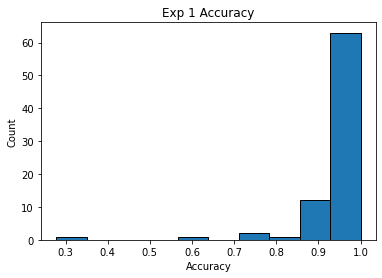

len files =  137
Total N =  137
Average accuracy:  0.9080832657474996
# of participants with acc below 90% =  54
Accuracy Histogram


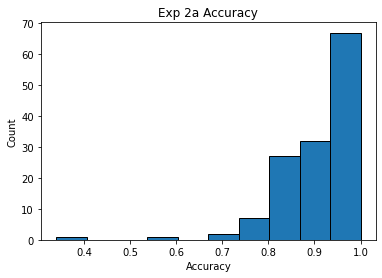

len files =  132
Total N =  132
Average accuracy:  0.9259025439580995
# of participants with acc below 90% =  44
Accuracy Histogram


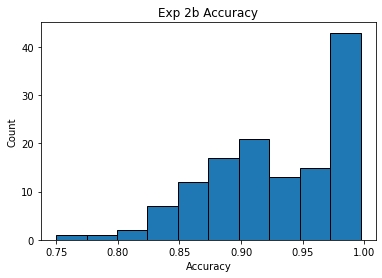

In [9]:
#Plot accuracy for each study and exclude participants with accuracy below 90%
overall_acc(exp1_path, 'Exp 1 Accuracy', True)
overall_acc(exp2a_path, 'Exp 2a Accuracy')
overall_acc(exp2b_path, 'Exp 2b Accuracy')

**Experiment 2a and 2b exclusions**

In [10]:
#Exp 2a
#exclude based on conditional performance
nback_present_phase_acc = []
background_present_phase_acc = []
background_acc_list = []
nback_acc_list = []
nback_exclusion_count = 0
background_exclusion_count = 0
nback_all_count = 0
background_all_count = 0

exp2a_data = glob.glob(exp2a_path+'*csv')
for f_name in exp2a_data:
    df = pd.read_csv(f_name)
    #file = os.path.basename(f_name)
    nback_acc, background_acc, both_acc, nback_press, background_press, check = exp2_conditional(df)
    present_phase_acc = get_present_accuracy(df)
    if '2back' in f_name:
        nback_all_count += 1
        nback_present_phase_acc.append(present_phase_acc)
        background_acc_list.append(background_acc)
        if background_acc < 0.5:
            exclusion_dict['f_name'].append(f_name)
            exclusion_dict['exclusion_criteria'].append('background_accuracy < 50%')
            nback_exclusion_count += 1
    elif 'background' in f_name:
        background_all_count += 1
        background_present_phase_acc.append(present_phase_acc)
        nback_acc_list.append(nback_acc)
        if nback_acc < 0.5:
            exclusion_dict['f_name'].append(f_name)
            exclusion_dict['exclusion_criteria'].append('2back_accuracy < 50%')
            background_exclusion_count += 1

print('Exp 2 nBack exclusion count: ', nback_exclusion_count)
print('Exp 2 background exclusion count: ', background_exclusion_count)

Exp 2 nBack exclusion count:  29
Exp 2 background exclusion count:  24


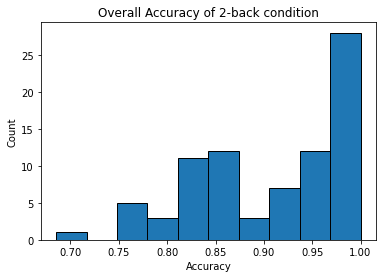

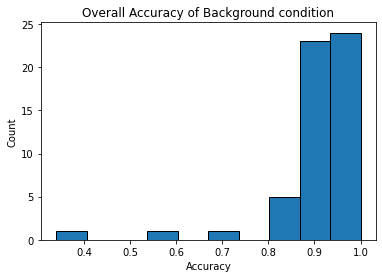

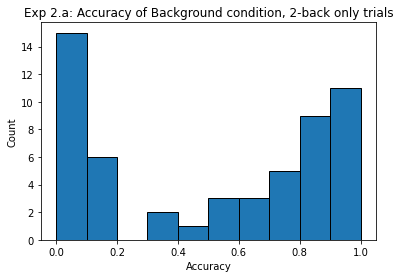

Number of participants excluded based on conditional accuracy:  24
Total participants left for analysis:  31


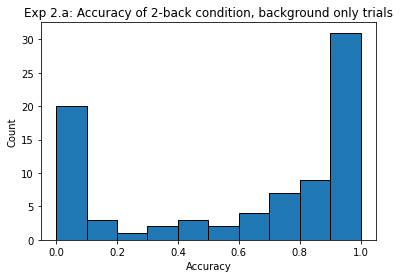

Number of participants excluded based on conditional accuracy:  29
Total participants left for analysis:  53


In [11]:
visualize_accuracy_hist(nback_present_phase_acc, 'Overall Accuracy of 2-back condition')
visualize_accuracy_hist(background_present_phase_acc, 'Overall Accuracy of Background condition')
visualize_accuracy_hist(nback_acc_list, 'Exp 2.a: Accuracy of Background condition, 2-back only trials')
print('Number of participants excluded based on conditional accuracy: ', background_exclusion_count)
print('Total participants left for analysis: ', len(background_present_phase_acc)-background_exclusion_count)
visualize_accuracy_hist(background_acc_list, 'Exp 2.a: Accuracy of 2-back condition, background only trials')
print('Number of participants excluded based on conditional accuracy: ', nback_exclusion_count)
print('Total participants left for analysis: ', len(nback_present_phase_acc)-nback_exclusion_count)


In [12]:
#exclude based on conditional performance
nback_present_phase_acc = []
background_present_phase_acc = []
background_acc_list = []
nback_acc_list = []
nback_exclusion_count = 0
background_exclusion_count = 0

exp2b_data = glob.glob(exp2b_path+'*csv')
for f_name in exp2b_data:
    df = pd.read_csv(f_name)
    #file = os.path.basename(f_name)
    nback_acc, background_acc, both_acc, nback_press, background_press, check = exp2_conditional(df)
    present_phase_acc = get_present_accuracy(df)
    if '2back' in f_name:
        nback_present_phase_acc.append(present_phase_acc)
        background_acc_list.append(background_acc)
        if background_acc < 0.5:
            exclusion_dict['f_name'].append(f_name)
            exclusion_dict['exclusion_criteria'].append('background_accuracy < 50%')
            nback_exclusion_count += 1
    if 'background' in f_name:
        background_present_phase_acc.append(present_phase_acc)
        nback_acc_list.append(nback_acc)
        if nback_acc < 0.5:
            exclusion_dict['f_name'].append(f_name)
            exclusion_dict['exclusion_criteria'].append('2back_accuracy < 50%')
            background_exclusion_count += 1

print('Exp 2b nBack exclusion count: ', nback_exclusion_count)
print('Exp 2b background exclusion count: ', background_exclusion_count)


Exp 2b nBack exclusion count:  12
Exp 2b background exclusion count:  34


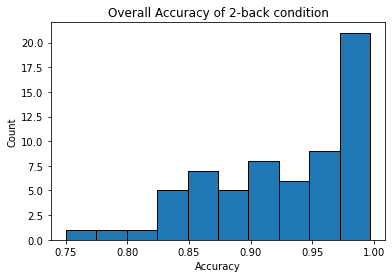

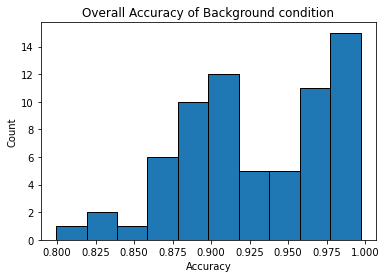

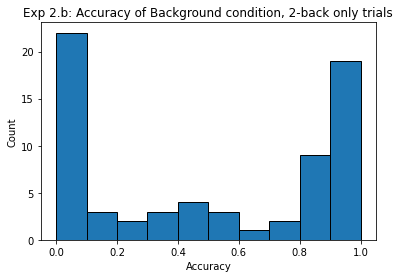

Number of participants excluded based on conditional accuracy:  34
Total participants left for analysis:  34


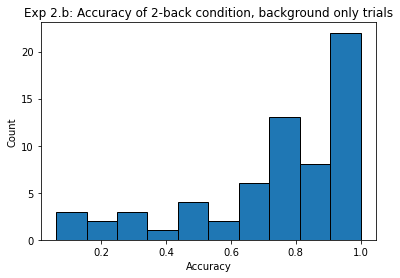

Number of participants excluded based on conditional accuracy:  12
Total participants left for analysis:  52


In [13]:
visualize_accuracy_hist(nback_present_phase_acc, 'Overall Accuracy of 2-back condition')
visualize_accuracy_hist(background_present_phase_acc, 'Overall Accuracy of Background condition')
visualize_accuracy_hist(nback_acc_list, 'Exp 2.b: Accuracy of Background condition, 2-back only trials')
print('Number of participants excluded based on conditional accuracy: ', background_exclusion_count)
print('Total participants left for analysis: ', len(background_present_phase_acc)-background_exclusion_count)
visualize_accuracy_hist(background_acc_list, 'Exp 2.b: Accuracy of 2-back condition, background only trials')
print('Number of participants excluded based on conditional accuracy: ', nback_exclusion_count)
print('Total participants left for analysis: ', len(nback_present_phase_acc)-nback_exclusion_count)

In [14]:
def count_low_accuracy_by_task(exp, exclusion_df):
    '''from exclusion_df, find files that were excluded due to low accuracy only,
    with separate counts for 'task-2back' and 'task-background'.'''
    
    # Filter by experiment
    exclusion_df = exclusion_df[exclusion_df['f_name'].str.contains(exp)]
    
    # Group by 'f_name' and aggregate the exclusion criteria
    grouped_df = exclusion_df.groupby('f_name')['exclusion_criteria'].agg(list)

    # Count entries with only 'present_accuracy < 90%' for 'task-2back'
    count_task_2back = grouped_df[grouped_df.index.str.contains('task-2back')].apply(
        lambda criteria: criteria == ['present_accuracy < 90%']).sum()
    
    # Count entries with only 'present_accuracy < 90%' for 'task-background'
    count_task_background = grouped_df[grouped_df.index.str.contains('task-background')].apply(
        lambda criteria: criteria == ['present_accuracy < 90%']).sum()
    
    return count_task_2back, count_task_background

In [15]:
exclusion_df = pd.DataFrame(exclusion_dict)
count_2a_2back, count_2a_background = count_low_accuracy_by_task('Exp 2a', exclusion_df)
print('Exp 2a 2back: ', count_2a_2back)
print('Exp 2a background: ', count_2a_background)
count_2b_2back, count_2b_background = count_low_accuracy_by_task('Exp 2b', exclusion_df)
print('Exp 2b 2back: ', count_2b_2back)
print('Exp 2b background: ', count_2b_background)

Exp 2a 2back:  7
Exp 2a background:  3
Exp 2b 2back:  10
Exp 2b background:  1


In [16]:
exclusion_df = pd.DataFrame(exclusion_dict)
exclusion_df.to_csv('../data/excluded_files_cleaned.csv', index = False)

len files =  80
Total N =  71
Average accuracy:  0.9678860198226401
# of participants with acc below 90% =  0
Accuracy Histogram


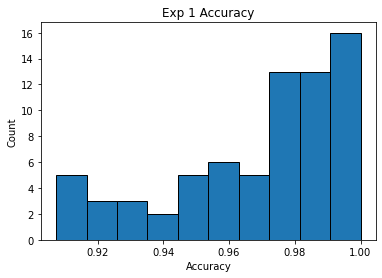

len files =  137
Total N =  74
Average accuracy:  0.968134801468135
# of participants with acc below 90% =  0
Accuracy Histogram


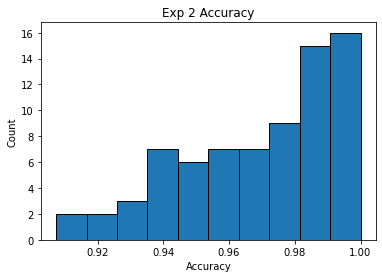

len files =  132
Total N =  75
Average accuracy:  0.964814814814815
# of participants with acc below 90% =  0
Accuracy Histogram


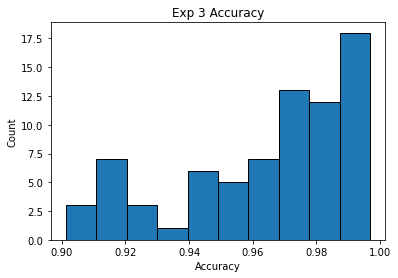

In [17]:
# Present phase accuracy after exclusion
excluded_files = exclusion_df['f_name'].to_list()
high_acc_exp1 = overall_acc(exp1_path, 'Exp 1 Accuracy', True, False, excluded_files)
high_acc_exp2 = overall_acc(exp2a_path, 'Exp 2 Accuracy', False, False, excluded_files)
high_acc_exp3 = overall_acc(exp2b_path, 'Exp 3 Accuracy', False, False, excluded_files)

Stimuli Releated Exploratory Stuff

In [22]:
def check_stimuli_distribution(df):
    df = df['pictures'].dropna()
    pic = df.values.tolist()
    
    current_segment_repeats = []
    nback_repeats = []
    previous_segments_repeats = []
    previous_segments = []
    
    total_images = len(pic)  # Assuming 324 for consistency with the setup
    segment_length = 6
    last_two_images = []

    for i in range(0, total_images, segment_length):
        # print(i)
        current_segment = pic[i:i+segment_length]
        for j, image in enumerate(current_segment):
            # Check for within-segment repeat
            if current_segment[:j].count(image) > 0:
                current_segment_repeats.append(image)
            # Check for 2-back repeat, including across segments
            if j < 2 and image in last_two_images:  # Checking 2-back across segments
                nback_repeats.append(image)
            elif j >= 2 and image == current_segment[j-2]:  # Regular 2-back check within the current segment
                nback_repeats.append(image)
            # Check for previous segment repeat
            if image in previous_segments:
                previous_segments_repeats.append(image)
        previous_segments.extend(current_segment)  # Update previous segments
        last_two_images = current_segment[-2:]
        # print('current_segment: ', current_segment)
        # print('current_segment_repeat: ', current_segment_repeats)
        # print('nback_repeat: ', nback_repeats)
        # print('previous segment: ', previous_segments_repeats)
    # Combine all repeats into a set for uniqueness
    all_repeats = set(current_segment_repeats + nback_repeats + previous_segments_repeats)

    # Count unique unrepeated images
    unrepeated_images = set(pic) - all_repeats  # Subtract all repeated images from the total set of images
    unrepeated = len(unrepeated_images) / total_images
    current_segment_repeat_pct = len(set(current_segment_repeats)) / total_images
    nback_repeat_pct = len(set(nback_repeats)) / total_images
    previous_segments_repeat_pct = len(set(previous_segments_repeats)) / total_images
    #print(unrepeated+current_segment_repeat_pct+nback_repeat_pct+previous_segments_repeat_pct)
    return unrepeated, current_segment_repeat_pct, nback_repeat_pct, previous_segments_repeat_pct



In [23]:
unrepeated_list = []
current_segment_repeat_pct_list = []
nback_repeat_pct_list = []
previous_segments_repeat_pct_list = []

exp2a_data = glob.glob(exp2a_path+'*csv')
for f_name in exp2a_data:
    df = pd.read_csv(f_name)
    file = os.path.basename(f_name)
    unrepeated, current_segment_repeat_pct, nback_repeat_pct, previous_segments_repeat_pct = check_stimuli_distribution(df)
    unrepeated_list.append(unrepeated)
    current_segment_repeat_pct_list.append(current_segment_repeat_pct)
    nback_repeat_pct_list.append(nback_repeat_pct)
    previous_segments_repeat_pct_list.append(previous_segments_repeat_pct)

print("Unrepeated average: ", sum(unrepeated_list)/len(unrepeated_list))
print("Unrepeated range: ", min(unrepeated_list), max(unrepeated_list))
print("Current segment repeat average: ", sum(current_segment_repeat_pct_list)/len(current_segment_repeat_pct_list))
print("Current segment repeat range: ", min(current_segment_repeat_pct_list), max(current_segment_repeat_pct_list))
print("Nback repeat average: ", sum(nback_repeat_pct_list)/len(nback_repeat_pct_list))
print("Nback repeat range: ", min(nback_repeat_pct_list), max(nback_repeat_pct_list))
print("Previous segment repeat average: ", sum(previous_segments_repeat_pct_list)/len(previous_segments_repeat_pct_list))
print("Previous segment repeat range: ", min(previous_segments_repeat_pct_list), max(previous_segments_repeat_pct_list))


Unrepeated average:  0.5207037938181486
Unrepeated range:  0.49382716049382713 0.5339506172839507
Current segment repeat average:  0.14035324862575474
Current segment repeat range:  0.13580246913580246 0.14814814814814814
Nback repeat average:  0.11311615752005064
Nback repeat range:  0.10493827160493827 0.11419753086419752
Previous segment repeat average:  0.07175362710642508
Previous segment repeat range:  0.05864197530864197 0.07716049382716049
